This Jupyter Notebook is pepared by name name

# 1 - Load Data and Perform Basic EDA

## I - Imopri Libraries

In [693]:
import numpy as np
import pandas as pd
import matplotlib as mpt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from sklearn.preprocessing import StandardScaler

## II - Import Data and Show Count of Rows and Rolumns

In [694]:
data = pd.read_csv('hrdata3.csv', index_col=[0])
data.shape

(12977, 7)

## III - Show First and Last 5 rows

In [695]:
data.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
1,29725,0.776,15,2,5,47,0.0
4,666,0.767,21,2,4,8,0.0
6,28806,0.920,5,2,1,24,0.0
7,402,0.762,13,0,5,18,1.0
8,27107,0.920,7,2,1,46,1.0


In [696]:
data.tail()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
19149,251,0.920,9,2,1,36,1.0
19150,32313,0.920,10,3,3,23,0.0
19152,29754,0.920,7,1,1,25,0.0
19155,24576,0.920,21,2,4,44,0.0
19156,5756,0.802,0,4,2,97,0.0


## IV - Show Count of Null Values

In [697]:
data.isnull().sum().sort_values(ascending = False)

enrollee_id               0
city_development_index    0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## V - Ensure All Columns are Numeric

In [698]:
data.dtypes

enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

## VI - Plot Heatmap

<AxesSubplot:>

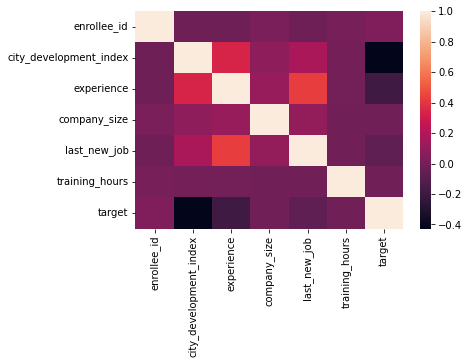

In [699]:
correlation = data.corr()
sns.heatmap(correlation)

# 2 - Feature Selection and Pre-Processing

## I - Put All Data Except 'enrollee_id' and 'target' into X

In [700]:
X = data.drop(['target', 'enrollee_id'], axis=1)

## II - Scale X with StandardScaler and Show Sample Data

In [701]:
scaler = StandardScaler()
scaler.fit(X)
scaledX = pd.DataFrame(scaler.transform(X), index=data.index, columns=X.columns)
scaledX.head()


,city_development_index,experience,company_size,last_new_job,training_hours
1,-0.503422,0.633957,-0.574723,1.690762,-0.308396
4,-0.578413,1.546009,-0.574723,1.081137,-0.951805
6,0.696434,-0.886130,-0.574723,-0.747739,-0.687842
7,-0.620075,0.329940,-1.488268,1.690762,-0.786828
8,0.696434,-0.582112,-0.574723,-0.747739,-0.324894


# 3 - KMeans Clustering

## I - Import Related Libraries and Perform KMeans on X W/ random_state = 47

In [702]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import pdist

In [703]:
model = KMeans(n_clusters=2, random_state=47)
modelScale = model.fit(scaledX)

# II - Show Cluster Centers as is Then Inverse and Show Again.
#	Explain The Centers as Related to the Columns of the Data Set

In [704]:
modelScale.cluster_centers_

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [705]:
scaler.inverse_transform(modelScale.cluster_centers_)

array([[ 0.7987756 ,  6.62300698,  2.9252866 ,  1.32309922, 66.4026881 ],
       [ 0.88943708, 16.75426875,  3.72717149,  3.49907201, 64.69413512]])

## III - Show Distance Matrix

In [706]:
dist = np.linalg.norm(X - modelScale.cluster_centers_[0,:],axis=1).reshape(-1,1)
dist = np.append(dist,np.linalg.norm(X - modelScale.cluster_centers_[1,:],axis=1).reshape(-1,1),axis=1)
dist

array([[49.89109396, 49.29997207],
       [23.63442522, 21.95312341],
       [24.8153105 , 24.43490269],
       ...,
       [26.23032115, 25.76671023],
       [49.29601924, 48.5309118 ],
       [97.11915062, 97.10288398]])

## IV - Show Labels

In [707]:
modelScale.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

## V - Add 'cluster_label' Column to the DataFrame and Assign it the KMean Label

In [708]:
scaledX['cluster_label'] = pd.Series(modelScale.labels_, index=data.index)
X['cluster_label'] = pd.Series(modelScale.labels_, index=data.index)

## VI - Add 'target' Column as a Floating-Point Value
##      Map the 'target' Column to a 'target_int' Column

In [709]:
scaledX['target'] = data['target'].astype(float)
scaledX['target_int'] = scaledX['target'].astype(int)

X['target'] = data['target'].astype(float)
X['target_int'] = X['target'].astype(int)


## VII - Show Top 5 Rows of DataFrame

In [710]:
scaledX.head(10)

,city_development_index,experience,company_size,last_new_job,training_hours,cluster_label,target,target_int
1,-0.503422,0.633957,-0.574723,1.690762,-0.308396,1,0.0,0
4,-0.578413,1.546009,-0.574723,1.081137,-0.951805,1,0.0,0
6,0.696434,-0.886130,-0.574723,-0.747739,-0.687842,0,0.0,0
7,-0.620075,0.329940,-1.488268,1.690762,-0.786828,1,1.0,1
8,0.696434,-0.582112,-0.574723,-0.747739,-0.324894,0,1.0,1
9,0.696434,0.937974,1.709140,1.690762,0.945427,1,0.0,0
11,0.696434,-0.886130,1.252367,-0.747739,0.697962,0,0.0,0
12,0.638108,1.546009,0.795595,0.471512,-0.704340,1,0.0,0
15,0.746428,0.785966,-1.031496,1.690762,-0.786828,1,0.0,0
16,0.696434,-1.494164,-0.574723,-1.357364,0.664966,0,0.0,0


## VIII - Print Confusion Matrix Comparing 'target_int' and 'cluster_label' Show classification report and Total Misclasifications

In [711]:
confusion_matrix(scaledX['target_int'], scaledX['cluster_label'])

array([[5835, 4860],
       [1747,  535]])

## IX - Discuss Numbers From 3 - VIII

the model classifies alot of negative instances as positive

## X - Show Inertial of the Cluster

In [712]:
modelScale.inertia_

49643.86379769526

## XI - What is the Elbow Method and What is it's Purpose is KMeans

The elbow method is a way of findng the optimal value of k by plotting the values of the inertia and finding the spot where the 'elbow' bends and starts decreasing in a roughly linear fassion

## XII - Plot the Inertias for KMeans With Clusters of 2 - 20

In [713]:
inertias = []
K = range(2, 21)
 
for k in K:
    # Building and fitting the model
    KModel = KMeans(n_clusters=k, random_state=47).fit(scaledX)
    inertias.append(KModel.inertia_)

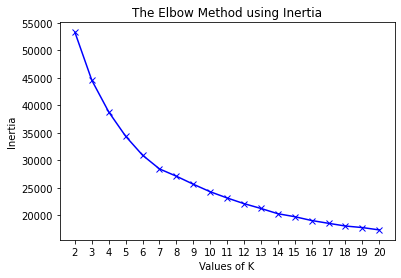

In [714]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.xticks(K)
plt.show()

## XIII - Show Scatter Plot with 'training_hours' Vs 'experience' with the points colored based on 'cluster_label'. Write thoughts on the plot

Text(0, 0.5, 'experience')

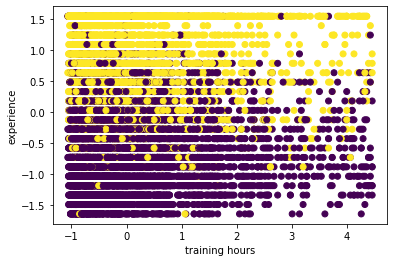

In [715]:
plt.scatter(scaledX['training_hours'], scaledX['experience'], c=scaledX['cluster_label'])
plt.xlabel('training hours')
plt.ylabel('experience')

the points are roughly cluster baned on expierence being a primary companent of the caculation

## XIV - Show Scatter Plot with Any Other 2 Attributes Similar to 3 - XIII. Write Thoughts on the Plot

Text(0, 0.5, 'company size')

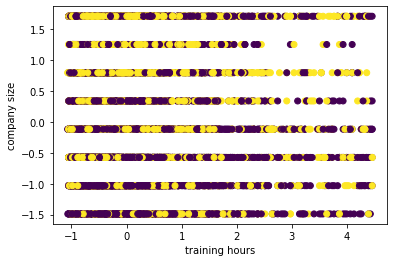

In [716]:
plt.scatter(scaledX['training_hours'], scaledX['company_size'], c=scaledX['cluster_label'])
plt.xlabel('training hours')
plt.ylabel('company size')

it seems like there is little correlation between the two sets of values and the cluster label

# 4 - AgglomerativeClustering

In [717]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## I - Plot Dendogram

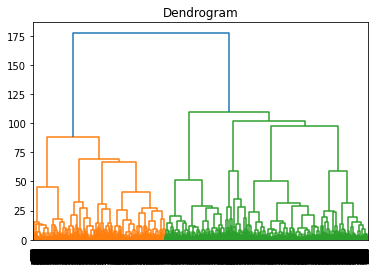

In [718]:
plt.Figure(figsize=(20,20))
plt.title('Dendrogram')
dend = dendrogram(linkage(scaledX, method='ward'))

## II - Perform AgglrmerativeClustering with 2 Clusters Using Euclidean Distarge fro Affinity and Linkage = 'ward'

In [719]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(scaledX)

## III - Plot 'training_hours' Vs 'experience'. Write Toughts on the Plot

Text(0, 0.5, 'experience')

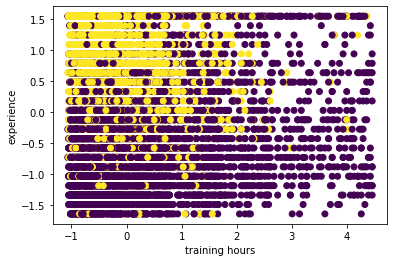

In [720]:
plt.scatter(scaledX['training_hours'], scaledX['experience'], c=model.labels_)
plt.xlabel('training hours')
plt.ylabel('experience')

the new model seems to use both expierence and training hours with entries having high ekperience and low training hours being in one group and everything else in the other

## IV - Increase Clusters to 4 or 5 and Build Clusters Again. Plot Them to See Difference

In [721]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(scaledX)

Text(0, 0.5, 'experience')

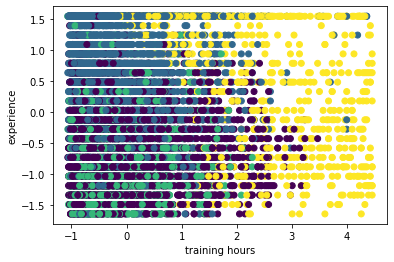

In [722]:
plt.scatter(scaledX['training_hours'], scaledX['experience'], c=model.labels_)
plt.xlabel('training hours')
plt.ylabel('experience')

emtries with high training hours are in one group, the other groups seem to be seperated into 3 groups based primarily on experience with 2 groups having heavy overlap in the lower experience band